Laboratorio 3

Práctica 3

Autores: Raúl Jiménez Juárez 
         Beatriz Magán Pinto 
         David Alonso Rodríguez Lepina 
         Andrés Felipe Sánchez Patarroyo 
         
Asignatura: Aprendizaje estadístico & Data Mining    

Fecha: 31 de octubre de 2019

Objetivo:
Un desguace de Madrid quiere automatizar la entrada de coches para ser más óptimo a la hora de despiezarlos y separar las distintas partes de los coches que reciben. Para ello han decidido crear un clasificador basado en las diferentes características de los coches y la probabilidad que pertenezca a una clase de coche u otra.

# Importamos las librerías necesarias

In [10]:
import numpy as np 
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Selección del clasficador
El clasificador seleccionado para la realización del ejercicio ha sido NAive Bayes. El motivo de emplear este algoritmo se debe a que solicitaun clasificador basado en la <b>probabilidad</b> de que el coche pertenezca a una clase u otra


## Dataset de autos:
El dataset de autos contiene las siguientes columnas:
<ul>
    <li><b>Buying price:</b> precio de compra</li>
    <li><b>Maintenance price: </b>precio de mantenimiento</li>
    <li><b>Doors: </b>numero de puertas del vehiculo</li>
    <li><b>Persons: </b>capacidad (en numero de personas)</li>
    <li><b>Luggage boot: </b>espacio del portaequipajes</li>
    <li><b>Safety: </b>seguridad estimada del vehiculo</li>
    <li><font color="red"><b>class:</b> clase a la que pertenece el vehiculo</font></li>
</ul>

In [2]:
df_cars = pd.read_csv('RecursosLab3/cars.csv', names=['buying_p', 'maint_p','doors','persons','lug_boot','safety','class'])
pd.options.display.max_columns = None
df_cars.describe()

,buying_p,maint_p,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,5more,more,small,high,unacc
freq,432,432,432,576,576,576,1210


### segun el documento cars.info, los valores para cada columna son los siguientes: <br>

<table>
    <tr>
        <th>Columna</th>
        <th>Valores posibles</th>
        <th>Total de valores</th>
    </tr>
    <tr>
        <td>buying</td>       
        <td>v-high, high, med, low</td>
        <td>4</td>
    </tr>
    <tr>
        <td>maint</td>
        <td>v-high, high, med, low</td>
        <td>4</td>
    </tr>
    <tr>
        <td>doors</td>
        <td>2, 3, 4, 5-more</td>
        <td>4</td>
    </tr>
    <tr>
        <td>persons</td>
        <td>2, 4, more</td>
        <td>3</td>
    </tr>
    <tr>
        <td>lug_boot</td>
        <td>small, med, big</td>
        <td>3</td>
    </tr>
    <tr>
        <td>safety</td>
        <td>low, med, high</td>
        <td>3</td>
    </tr> 
    <tr>
        <td><b>class</b></td>
        <td><b>unacc, acc, good, v-good</b></td>
        <td><b>4</b></td>
    </tr> 
   </table>
   <br>
   <br>
   Los cuales corresponden a la cantidad de atributos unicos de cada columna segun la descripción del dataframe, adicionalemente, evidenciamos que no se encuentran campos vacios, por lo que para este caso no es necesaria la limpieza de datos 

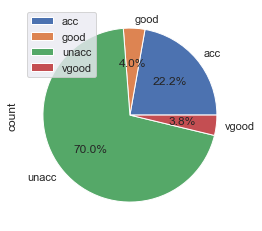

In [46]:
df_cars.groupby('class').count()[['doors']].rename(columns={'doors':'count'}).plot.pie(y='count',autopct='%1.1f%%')

Podemos ver como las clases tienen una distribución anormal (dos de ellas tienen menos del 5% del total de coches, mientras que otra agrupa al 70% de ellos)

## Preprocesamiento de datos
se pasa de datos categoricos a numericos y se divide el dataset para poder realizar entrenamiento y validación

In [3]:
#2º Realizamos el preprocesamiento necesario para poder entrenar el clasificador
le = preprocessing.LabelEncoder()
df_cars_norm=pd.DataFrame()
atributos=[]
#transformación de variables categoricas a numericas (se exige para utilizar los metodos de Naive Bayes)
for i in df_cars.columns:
    df_cars_norm[i]=le.fit_transform(df_cars[i])
    #guardamos los atributos categoricos
    atributos.append(list(le.classes_))
#Separación de los datos de entrenamiento y de prueba (90% entrenamiento, 10% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_cars_norm[df_cars.columns.difference(['class'])], df_cars_norm[['class']], test_size=0.1,random_state=10)


In [4]:
print('cantidad de datos de entrenamiento: {}\tcantidad de datos de prueba: {}'.format(len(X_train),len(X_test)))

cantidad de datos de entrenamiento: 1555	cantidad de datos de prueba: 173


## Entrenamiento del clasificador
se utilizaron el 90% de los datos disponibles en el dataset para su entrenamiento

In [5]:
#Se crea el clasificador Bayesiano
gnb = GaussianNB()

#Se entrena el modelo con los atributos y clases de entrenamiento
gnb.fit(X_train,y_train['class'])

#A partir del modelo previemente entrenado, se predicen las clases de los elementos de entrenamiento
y_pred = gnb.predict(X_test)
#se comparan los resultados de la predicción con las clases etiquetadas y se calcula el error
print("Error:",(1-metrics.accuracy_score(y_test, y_pred)))

Error: 0.2890173410404624


## Error encontrado
<b>Para la configuración realizada del modelo y los elementos de prueba, se encontro un error cercano al 30% tal como puede observarse en la celda de arriba</b>

## Analisis de casos particulares
se revisarán 5 coches y sus predicciones realizadas por el clasificador

In [6]:
#metodo para graficar un pie chart con los porcentajes para cada 
#posible clase dado un elemento a predecir, asi como la clase predicha y su clase real (etiqueta)
def print_prob(a,val,ind):
    probs=gnb.predict_proba(a)[0]
    sns.set()
    plt.pie(probs,labels=atributos[-1], autopct='%1.1f%%')
    plt.title('predicción para el coche '+str(ind))
    plt.show()
    pred=atributos[-1][gnb.predict(a)[0]]
    print('predicción: {}, valor real: {}'.format(pred,val))

In [19]:
def mostrar_confusionMatriz(y_validacion, y_predicho):
    print("\nPrecisión obtenida: ", metrics.accuracy_score(y_validacion, y_predicho))
    confunsionMatriz = confusion_matrix(y_validacion, y_predicho)
    plt.figure(figsize=(6, 6))
    fig, ax = plt.subplots()
    fig.canvas.draw()
    sns.heatmap(confunsionMatriz, annot=True, fmt="d");
    ax.set_xticklabels(atributos[-1])
    ax.set_yticklabels(atributos[-1])
    plt.title("Matriz de confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase predicha')
    plt.show()

,buying_p,doors,lug_boot,maint_p,persons,safety
562,high,2,med,high,more,med


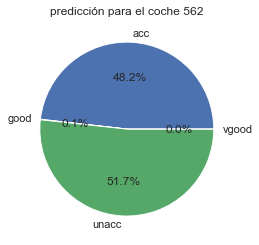

predicción: unacc, valor real: unacc


,buying_p,doors,lug_boot,maint_p,persons,safety
720,high,4,small,med,more,low


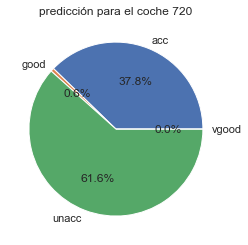

predicción: unacc, valor real: unacc


,buying_p,doors,lug_boot,maint_p,persons,safety
427,vhigh,5more,med,low,more,med


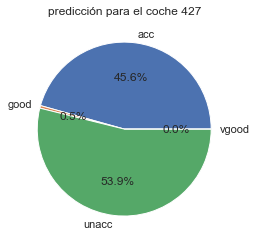

predicción: unacc, valor real: acc


,buying_p,doors,lug_boot,maint_p,persons,safety
230,vhigh,2,med,med,4,high


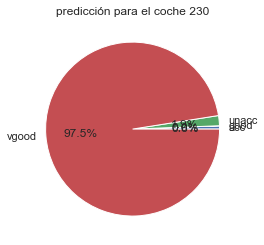

predicción: vgood, valor real: acc


,buying_p,doors,lug_boot,maint_p,persons,safety
267,vhigh,3,big,med,more,low


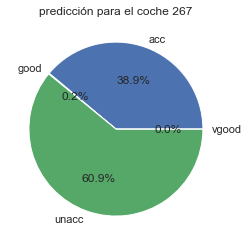

predicción: unacc, valor real: unacc


In [13]:
#Usamos el clasificador para saber a qué clase corresponden al menos 5 coches que no hayamos usado para entrenar el modelo. 
random.seed(45)
#se seleccionan 5 coches de forma aleatoria (utilizando una semilla, para poder analizar los mismos datos)
random_cars=random.choices(list(X_test.index), k=5)
for i in random_cars:
    display(df_cars.loc[[i]][df_cars.columns.difference(['class'])])
    val=df_cars.loc[[i]]['class'].values[0]
    a=X_test.loc[[i]].values
    print_prob(a,val,i)

Se puede observar que de los 5 casos acerto 3 todos ellos con la clas "unacceptable" la cual es la clase con mas apariciones en el dataset (cerca del 70% de los coches clasifican dentro de esta categoria) sin embargo los dos coches mal clasificados pertenecen a clases con menos apariciones, por lo que podriamos decir que a pesar de tener un error del 30%, clasifica mucho peor las clases que menos apariciones tuvieron en el set de entrenamiento (datos desbalanceados). 

## matriz de confusión
Para revisar que tan bien clasifica cada una de las clases, vamos a representar los resultados mediante una matriz de confusión

,conteo
clase,
acc,24
good,8
unacc,133
vgood,8



Precisión obtenida:  0.7109826589595376


<Figure size 432x432 with 0 Axes>

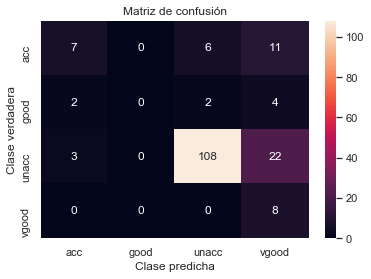

In [40]:
y_test['conteo']=0
y_test['clase']=np.array(atributos[-1])[np.array(list(y_test['class']))]
display(y_test.groupby('clase').count()[['conteo']])
y_test.drop(columns=['conteo','clase'], inplace=True)
mostrar_confusionMatriz(y_test, y_pred)

podemos ver como de los 24 vehiculos "acceptable" solo clasifica bien 7 de ellos y para la clase "good" no clasifica correctamente ninguno de los 8 coches, para las clases "unacc" y "very good" se tiene una cantidad de predicciones correctas aceptable (para vgood acierta todas las veces la clasificación), se considera que esto sucede ya que las clases tienen un <b>orden</b> (unacc, acc, good, vgood) y al ser unacc y good los extremos, es muy probable que las caracteristicas de los coches que caen en estas categorias sean opuestos, mientras que acc y good, al estar en el medio de la clasificación pueden compartir bastantes similitudes, esto sumado al hecho de que la cantidad de coches que entran en estas categorias es bastante inferior al de la clase dominante (<b>unacc</b>). Una posible solución a este problema es el incluir mas registros con cohes de las otras categorias (principalmente acc y good), de tal forma que este balanceada la cantidad de coches en cada una.